In [95]:
from joblib import Parallel, delayed
from __init__ import *
import Setting as _C
reload(_C)
import utils as _U
reload(_U)
import Features as _F
reload(_F)
import Dataloader as _D
reload(_D)

<module 'Dataloader' from 'c:\\Users\\shuai.song\\data\\Causis\\CTA_Trend\\Dataloader.py'>

In [96]:
COM_data = _D.Dataset('1min')

Using Local 1min  Data | BackTest VTD: 2010-01-04--2022-08-19


In [97]:
COM = COM_data['rb']
COM = COM.set_index('CLOCK', drop=False)

In [98]:
COM = _F.technical_analysis(COM, logger = True, PADJ=False, save=False)

[TR]                 | 2022-08-24 13:55:45 Done | Using  29.021 seconds
[Short Super Trend]  | 2022-08-24 13:56:12 Done | Using  26.674 seconds
[Long Super Trend]   | 2022-08-24 13:56:39 Done | Using  26.745 seconds
[Plus Super Trend]   | 2022-08-24 13:57:05 Done | Using  26.834 seconds


In [196]:
F_data = {}
F_data['rb'] = COM

In [3]:
# trading_logs = {}
# all_buy = pd.DataFrame()
# all_sell = pd.DataFrame()
# all_total = pd.DataFrame()

# for com in _C.commodities.keys():
#     com_log = np.load(f'output/trading_logs/{com}_logs.npy', allow_pickle=True)
#     com_log = com_log.tolist() # [BUY_log, SELL_log, TOTAL_log]
#     trading_logs[com] = com_log

In [19]:
# def Judge_Pos(com):
#     ddf = pd.read_csv(f'output/features/{com}_features.csv')
#     ddf = ddf.set_index('CLOCK.1')

#     ddf['signal'] = np.zeros(ddf.shape[0])
#     clock_list = ddf['CLOCK'].to_list()

#     for i in range(trading_logs[com][0].shape[0]):
#         entry = trading_logs[com][0].iloc[i]
#         start = entry['open_bar']
#         end = entry['close_bar']
#         ddf['signal'].loc[start: end] = 1

#     for i in range(trading_logs[com][1].shape[0]):
#         entry = trading_logs[com][1].iloc[i]
#         start = entry['open_bar']
#         end = entry['close_bar']
#         ddf['signal'].loc[start: end] = -1

#     return ddf

In [17]:
# F_data=  {}
# tasks = []
# ## Positions
# for com in _C.commodities.keys():
#     tasks.append(delayed(Judge_Pos)(com))

# multi_work = Parallel(n_jobs=8, backend='threading', verbose=80)
# res = multi_work(tasks)

# for com in _C.commodities.keys():
#     F_data[com] = res[list(_C.commodities.keys()).index(com)]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    8.3s
[Parallel(n_jobs=8)]: Done   2 out of  15 | elapsed:   10.0s remaining:  1.1min
[Parallel(n_jobs=8)]: Done   3 out of  15 | elapsed:   10.3s remaining:   41.4s
[Parallel(n_jobs=8)]: Done   4 out of  15 | elapsed:   11.0s remaining:   30.3s
[Parallel(n_jobs=8)]: Done   5 out of  15 | elapsed:   11.2s remaining:   22.5s
[Parallel(n_jobs=8)]: Done   6 out of  15 | elapsed:   11.4s remaining:   17.1s
[Parallel(n_jobs=8)]: Done   7 out of  15 | elapsed:   14.0s remaining:   16.0s
[Parallel(n_jobs=8)]: Done   8 out of  15 | elapsed:   14.7s remaining:   12.9s
[Parallel(n_jobs=8)]: Done   9 out of  15 | elapsed:   16.3s remaining:   10.9s
[Parallel(n_jobs=8)]: Done  10 out of  15 | elapsed:   20.0s remaining:   10.0s
[Parallel(n_jobs=8)]: Done  11 out of  15 | elapsed:   20.1s remaining:    7.2s
[Parallel(n_jobs=8)]: Done  12 out of  15 | elapsed:   20.6

In [180]:
def plot_all(scom, t_start, t_end):
    stmp = F_data[scom][t_start:t_end].copy(deep=True)

    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 5), dpi=150, sharex=True)
    axes[0].tick_params(labelsize=7)
    axes[1].tick_params(labelsize=7)

    ## Subplot 0
    # K bars
    sdf = pd.DataFrame()
    sdf['CLOCK'] = stmp['CLOCK'].apply(lambda x: pd.to_datetime(x))
    sdf = sdf.set_index('CLOCK')
    sdf['Open'] = stmp['OPEN']
    sdf['Close'] = stmp['CLOSE']
    sdf['High'] = stmp['HIGH']
    sdf['Low'] = stmp['LOW']
    sdf['Volume'] = stmp['VOLUME']

    mc = mpf.make_marketcolors(up='red', down='green', edge='black')
    s = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc, y_on_right=False)
    mpf.plot(sdf, ax = axes[0], type='candle', style = s, ylabel='')
    
    # Super Trends
    stmp['UB_S'].loc[stmp['STD_S']== 1] = np.nan
    stmp['LB_S'].loc[stmp['STD_S']==-1] = np.nan

    stmp['UB_L'].loc[stmp['STD_L']== 1] = np.nan
    stmp['LB_L'].loc[stmp['STD_L']==-1] = np.nan

    stmp['UB_P'].loc[stmp['STD_P']== 1] = np.nan
    stmp['LB_P'].loc[stmp['STD_P']==-1] = np.nan

    stmp['UB_S'].plot(ax=axes[0], color='g', linestyle='--', alpha=0.8, linewidth=0.6)
    stmp['LB_S'].plot(ax=axes[0], color='r', linestyle='--', alpha=0.8, linewidth=0.6)

    stmp['UB_L'].plot(ax=axes[0], color='skyblue', linestyle='-.', alpha=0.8, linewidth=1.)
    stmp['LB_L'].plot(ax=axes[0], color='orange', linestyle='-.', alpha=0.8, linewidth=1.)

    stmp['UB_P'].plot(ax=axes[0], color='blue', linestyle='-', alpha=0.8, linewidth=1.2)
    stmp['LB_P'].plot(ax=axes[0], color='purple', linestyle='-', alpha=0.8, linewidth=1.2)

    axes[0].legend()

    ## Subplot 1
    stmp['CLOSE'].plot(ax=axes[1], color='b', alpha=0.8, linewidth=0.8)
    ax_twin = axes[1].twinx()
    ax_twin.tick_params(labelsize=7)
    # ax_twin.set_ylim(-1,1)
    axes[1].legend(loc='upper right')

    stmp['FLUCT'].plot(ax=ax_twin, color='r')
    # # BUY_POS = stmp.loc
    # BUY_POS = stmp.copy(deep=True)
    # BUY_POS['signal'].loc[BUY_POS['signal']!=1]=0
    # plt.bar(BUY_POS.index.to_list(), BUY_POS['signal'], color='pink', alpha=0.5, label='BUY Pos')

    # SELL_POS = stmp.copy(deep=True)
    # SELL_POS['signal'].loc[SELL_POS['signal']!=-1]=0
    # plt.bar(SELL_POS.index.to_list(), SELL_POS['signal'], color='green', alpha=0.5, label='SELL Pos')
    # ax_twin.legend(loc='upper left')

    x_ticks = []
    for i in range(stmp.shape[0]):
        if i % 10 == 0:
            x_ticks.append(stmp['CLOCK'].iloc[i])
        else:
            x_ticks.append('')
    ax_twin.set_xticklabels(labels=x_ticks,visible=True)
    fig.autofmt_xdate()
    plt.tight_layout()
    plt.show()

In [101]:
COM.index

Index(['2010-01-04 09:01:00', '2010-01-04 09:02:00', '2010-01-04 09:03:00',
       '2010-01-04 09:04:00', '2010-01-04 09:05:00', '2010-01-04 09:06:00',
       '2010-01-04 09:07:00', '2010-01-04 09:08:00', '2010-01-04 09:09:00',
       '2010-01-04 09:10:00',
       ...
       '2022-08-19 22:51:00', '2022-08-19 22:52:00', '2022-08-19 22:53:00',
       '2022-08-19 22:54:00', '2022-08-19 22:55:00', '2022-08-19 22:56:00',
       '2022-08-19 22:57:00', '2022-08-19 22:58:00', '2022-08-19 22:59:00',
       '2022-08-19 23:00:00'],
      dtype='object', name='CLOCK', length=900510)

In [109]:
COM['STD_S_Fork'] = 0.5*(2-np.abs(COM['STD_S']+COM['STD_S'].shift(1)))/COM['STD_S']
COM['STD_L_Fork'] = 0.5*(2-np.abs(COM['STD_L']+COM['STD_L'].shift(1)))/COM['STD_L']
COM['STD_P_Fork'] = 0.5*(2-np.abs(COM['STD_P']+COM['STD_P'].shift(1)))/COM['STD_P']

In [131]:
COM.loc[(COM['STD_S_Fork']==-1) & (COM['STD_L_Fork']==-1) & (COM['STD_P_Fork']==-1)].head()

,SYMBOL,CLOCK,OPEN,HIGH,LOW,CLOSE,VOLUME,INTEREST,SETTLE,ADJ,...,STD_S,UB_L,LB_L,STD_L,UB_P,LB_P,STD_P,STD_S_Fork,STD_L_Fork,STD_P_Fork
CLOCK,,,,,,,,,,,,,,,,,,,,,
2010-01-05 14:24:00,R.CN.SHF.rb.0004,2010-01-05 14:24:00,4591.0,4591.0,4588.0,4589.0,4494.0,991328.0,0.0,0.869811,...,-1.0,4591.00,4589.45,-1.0,4591.318182,4589.227273,-1.0,-1.0,-1.0,-1.0
2010-01-06 10:58:00,R.CN.SHF.rb.0004,2010-01-06 10:58:00,4631.0,4632.0,4628.0,4628.0,4984.0,1072020.0,0.0,0.869811,...,-1.0,4634.50,4629.70,-1.0,4635.636364,4628.636364,-1.0,-1.0,-1.0,-1.0
2010-01-06 14:25:00,R.CN.SHF.rb.0004,2010-01-06 14:25:00,4630.0,4631.0,4628.0,4628.0,3222.0,1068854.0,0.0,0.869811,...,-1.0,4632.05,4629.30,-1.0,4632.590909,4629.045455,-1.0,-1.0,-1.0,-1.0
2010-01-07 09:17:00,R.CN.SHF.rb.0004,2010-01-07 09:17:00,4641.0,4642.0,4633.0,4633.0,13646.0,1036084.0,0.0,0.869811,...,-1.0,4643.20,4636.90,-1.0,4645.681818,4634.409091,-1.0,-1.0,-1.0,-1.0
2010-01-08 14:25:00,R.CN.SHF.rb.0004,2010-01-08 14:25:00,4460.0,4461.0,4453.0,4454.0,10586.0,926070.0,0.0,0.869811,...,-1.0,4461.35,4457.40,-1.0,4462.272727,4456.954545,-1.0,-1.0,-1.0,-1.0


In [167]:
COM['P123'] = (COM['HIGH']+COM['LOW']+COM['CLOSE'])/3

In [195]:
COM['FLUCT'] = COM['CLOSE'].ewm(span=15, min_periods=1).mean().rolling(30, min_periods=1).std()
# COM['FLUCT_R'] = COM['FLUCT_R'].rolling(15, min_periods=

In [154]:
COM.loc[(COM['STD_S']==-1) & (COM['STD_L_Fork']==-1) & (COM['STD_P']==1)].shape[0] # SELL

15333

In [208]:
A = [1, 2, 3, 4, 5, 6, 7, 8, 9]

In [211]:
a =pd.Series(A)

In [215]:
t1 = pd.Series([12,23, 33, 43, 53], index=['a', 'b', 'c', 'd', 'e'])

In [216]:
t1[[i*5-1 for i in range()]]

a    12
b    23
c    33
d    43
e    53
dtype: int64

In [205]:
CC = COM['FLUCT'] > COM['FLUCT'].rolling(300, min_periods=1).quantile(0.8)

In [218]:
CC.index

Index(['2010-01-04 09:01:00', '2010-01-04 09:02:00', '2010-01-04 09:03:00',
       '2010-01-04 09:04:00', '2010-01-04 09:05:00', '2010-01-04 09:06:00',
       '2010-01-04 09:07:00', '2010-01-04 09:08:00', '2010-01-04 09:09:00',
       '2010-01-04 09:10:00',
       ...
       '2022-08-19 22:51:00', '2022-08-19 22:52:00', '2022-08-19 22:53:00',
       '2022-08-19 22:54:00', '2022-08-19 22:55:00', '2022-08-19 22:56:00',
       '2022-08-19 22:57:00', '2022-08-19 22:58:00', '2022-08-19 22:59:00',
       '2022-08-19 23:00:00'],
      dtype='object', name='CLOCK', length=900510)

In [206]:
CC.loc[CC]

CLOCK
2010-01-04 09:13:00    True
2010-01-04 09:14:00    True
2010-01-04 09:15:00    True
2010-01-04 09:16:00    True
2010-01-04 09:17:00    True
                       ... 
2022-08-19 21:45:00    True
2022-08-19 21:46:00    True
2022-08-19 21:47:00    True
2022-08-19 21:48:00    True
2022-08-19 21:49:00    True
Name: FLUCT, Length: 185420, dtype: bool

In [207]:
COM.loc[(COM['STD_S_Fork']==1) & (COM['STD_L']==1)].loc[CC]

,SYMBOL,CLOCK,OPEN,HIGH,LOW,CLOSE,VOLUME,INTEREST,SETTLE,ADJ,...,STD_L,UB_P,LB_P,STD_P,STD_S_Fork,STD_L_Fork,STD_P_Fork,h123,P123,FLUCT
CLOCK,,,,,,,,,,,,,,,,,,,,,
2010-01-05 09:01:00,R.CN.SHF.rb.0004,2010-01-05 09:01:00,4592.0,4603.0,4592.0,4603.0,31412.0,967220.0,0.0,0.869811,...,1.0,4586.454545,4584.772727,1.0,1.0,1.0,1.0,4599.333333,4599.333333,6.224909
2010-01-06 09:43:00,R.CN.SHF.rb.0004,2010-01-06 09:43:00,4625.0,4631.0,4624.0,4630.0,20164.0,1049764.0,0.0,0.869811,...,1.0,4629.909091,4620.227273,1.0,1.0,0.0,0.0,4628.333333,4628.333333,10.070339
2010-01-07 10:12:00,R.CN.SHF.rb.0004,2010-01-07 10:12:00,4468.0,4537.0,4461.0,4528.0,27900.0,1003056.0,0.0,0.869811,...,1.0,4507.681818,4426.818182,1.0,1.0,1.0,1.0,4508.666667,4508.666667,19.542866
2010-01-08 10:48:00,R.CN.SHF.rb.0004,2010-01-08 10:48:00,4442.0,4447.0,4442.0,4447.0,6596.0,927982.0,0.0,0.869811,...,1.0,4447.772727,4435.954545,-1.0,1.0,1.0,-0.0,4445.333333,4445.333333,10.058941
2010-01-11 09:21:00,R.CN.SHF.rb.0004,2010-01-11 09:21:00,4494.0,4497.0,4494.0,4496.0,4840.0,904498.0,0.0,0.869811,...,1.0,4500.090909,4488.045455,1.0,1.0,0.0,0.0,4495.666667,4495.666667,13.612682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-17 13:39:00,R.CN.SHF.rb.0004,2022-08-17 13:39:00,4060.0,4064.0,4060.0,4064.0,6607.0,1673441.0,0.0,1.245742,...,1.0,4067.136364,4050.000000,-1.0,1.0,1.0,-0.0,4062.666667,4062.666667,7.841397
2022-08-17 14:56:00,R.CN.SHF.rb.0004,2022-08-17 14:56:00,3994.0,4006.0,3993.0,4002.0,22174.0,1665395.0,0.0,1.245742,...,1.0,4005.136364,3982.772727,-1.0,1.0,1.0,-0.0,4000.333333,4000.333333,16.245848
2022-08-17 21:03:00,R.CN.SHF.rb.0004,2022-08-17 21:03:00,3999.0,4007.0,3998.0,4005.0,13694.0,1660602.0,0.0,1.245742,...,1.0,4005.136364,3987.272727,-1.0,1.0,0.0,-0.0,4003.333333,4003.333333,15.074491


In [ ]:
COM.loc[(COM['STD_S']==1) & (COM['STD_L_Fork']==1) & (COM['STD_P']==-1)].loc['2022-08-05 09:01:00': '2022-08-09 09:40:00'] # BUY

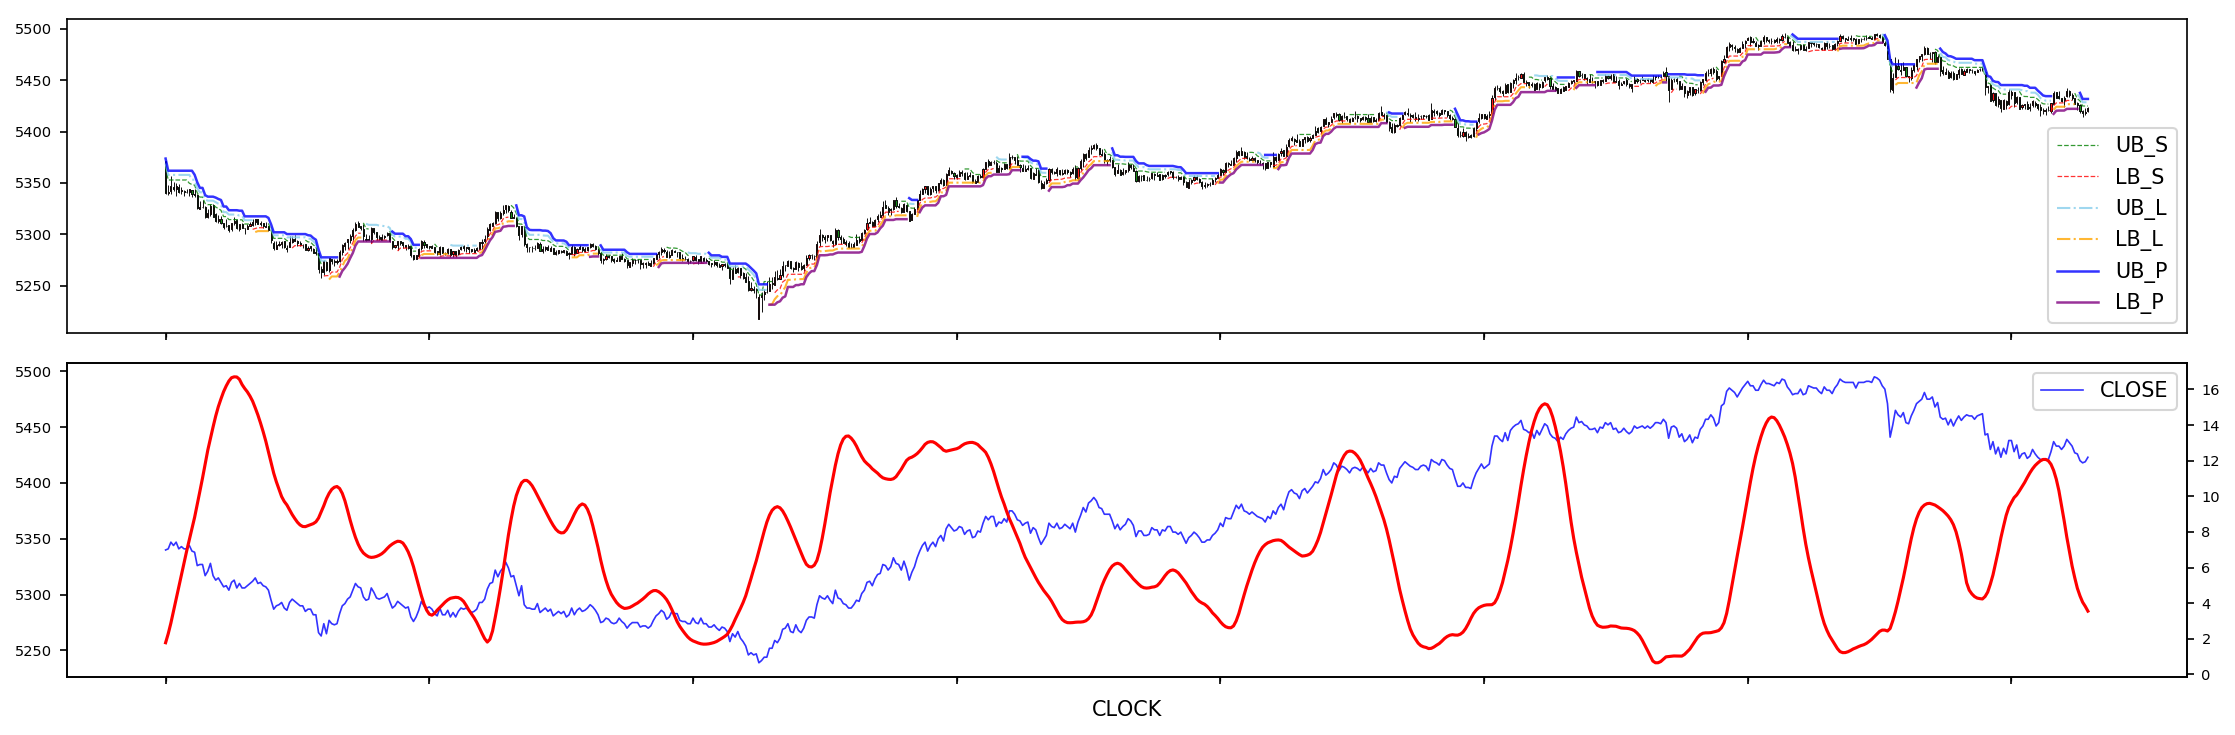

In [199]:
plot_all('rb', '2021-08-03 09:01:00', '2021-08-05 09:40:00')

In [5]:
dfc = pd.read_csv('./output/features/v1/bu_features.csv',index_col=0)

In [6]:
dfc

,SYMBOL,CLOCK.1,OPEN,HIGH,LOW,CLOSE,VOLUME,INTEREST,SETTLE,ADJ,...,CLOSE_adj,HIGH_adj,LOW_adj,TR,UB_S,LB_S,STD_S,UB_L,LB_L,STD_L
CLOCK,,,,,,,,,,,,,,,,,,,,,
2013-10-10 09:05:00,R.CN.SHF.bu.0004,2013-10-10 09:05:00,4460.0,4496.0,4452.0,4494.0,22700.0,66086.0,0.0,1.000000,...,4494.0,4496.0,4452.0,44.0,4562.000000,4386.000000,1.0,4606.0,4342.0,1.0
2013-10-10 09:10:00,R.CN.SHF.bu.0004,2013-10-10 09:10:00,4494.0,4512.0,4492.0,4498.0,18042.0,65858.0,0.0,1.000000,...,4498.0,4512.0,4492.0,20.0,4562.000000,4438.000000,1.0,4598.0,4406.0,1.0
2013-10-10 09:15:00,R.CN.SHF.bu.0004,2013-10-10 09:15:00,4498.0,4512.0,4488.0,4494.0,11304.0,65596.0,0.0,1.000000,...,4494.0,4512.0,4488.0,24.0,4558.666667,4441.333333,1.0,4588.0,4412.0,1.0
2013-10-10 09:20:00,R.CN.SHF.bu.0004,2013-10-10 09:20:00,4494.0,4494.0,4484.0,4490.0,6080.0,66170.0,0.0,1.000000,...,4490.0,4494.0,4484.0,10.0,4538.000000,4441.333333,1.0,4562.5,4415.5,1.0
2013-10-10 09:25:00,R.CN.SHF.bu.0004,2013-10-10 09:25:00,4490.0,4494.0,4486.0,4486.0,3886.0,66962.0,0.0,1.000000,...,4486.0,4494.0,4486.0,8.0,4532.400000,4447.600000,1.0,4553.6,4426.4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-19 14:40:00,R.CN.SHF.bu.0004,2022-08-19 14:40:00,3977.0,3978.0,3962.0,3965.0,5932.0,476718.0,0.0,0.479629,...,3965.0,3978.0,3962.0,16.0,3983.300000,3958.900000,-1.0,4001.2,3948.1,-1.0
2022-08-19 14:45:00,R.CN.SHF.bu.0004,2022-08-19 14:45:00,3964.0,3967.0,3958.0,3958.0,6000.0,475910.0,0.0,0.479629,...,3958.0,3967.0,3958.0,9.0,3983.300000,3958.900000,-1.0,3997.3,3948.1,-1.0
2022-08-19 14:50:00,R.CN.SHF.bu.0004,2022-08-19 14:50:00,3958.0,3961.0,3945.0,3948.0,12690.0,475331.0,0.0,0.479629,...,3948.0,3961.0,3945.0,16.0,3977.400000,3928.600000,-1.0,3989.3,3948.1,-1.0
